A Detailed Explanation of the Transformer Architecture by Faruq Afolabi Oluwatobi. implemented on Yor-Eng Translation.

[ My Profile](https://www.linkedin.com/in/faruq-afolabi-819068225/),

Kindly share and achnowledge the Information here.

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df = pd.read_csv('Train.csv')
df.head()

,ID,Yoruba,English
0,ID_AAJEQLCz,A ṣètò Ìgbìmọ̀ Tó Ń Ṣètò Ìrànwọ́ Nígbà Àjálù l...,A Disaster Relief Committee was formed to orga...
1,ID_AASNedba,"Ìrọ̀lẹ́ May 22, 2018 ni wọ́n fàṣẹ ọba mú Arákù...",Brother Solovyev was arrested on the evening o...
2,ID_AAeQrhMq,Iléeṣẹ́ Creative Commons náà,Creative Commons the Organization
3,ID_AAxlMgPP,"Pè̩lú Egypt, Morocco àti Tunisia tí wó̩n ti lo...","With Egypt, Morocco and Tunisia out of the Wor..."
4,ID_ABKuMKSx,Adájọ́ àgbà lórílẹ̀ èdè Náíjíríà (Attorney Gen...,"The Attorney General of the Federation, Justic..."


In [ ]:
df.columns

Index(['ID', 'Yoruba', 'English'], dtype='object')

In [ ]:
source_sentences = df['Yoruba'].astype(str).tolist()
target_sentences = df['English'].astype(str).tolist()
target_sentences = ['<start> ' + sentence + ' <end>' for sentence in target_sentences]

In [ ]:
target_sentences[:5]

['<start> A Disaster Relief Committee was formed to organize the long-term relief efforts. <end>',
 '<start> Brother Solovyev was arrested on the evening of May 22, 2018, at a railway station, as he was arriving home from a trip abroad with his wife, Anna. <end>',
 '<start> Creative Commons the Organization <end>',
 '<start> With Egypt, Morocco and Tunisia out of the World Cup, Senegal, the only African nation left,  will take on Columbia in their last group H game on Thursday. <end>',
 '<start> The Attorney General of the Federation, Justice Abubakar Malami has ordered the Department of State Services (DSS) to hands off the trial of Omoyele Sowore. <end>']

In [ ]:
import pickle
source_tokenizer = Tokenizer(filters='')
target_tokenizer = Tokenizer(filters='')

source_tokenizer.fit_on_texts(source_sentences)
target_tokenizer.fit_on_texts(target_sentences)

In [ ]:
source_tokenizer.word_index

{'àwọn': 1,
 'tí': 2,
 'ní': 3,
 'tó': 4,
 'ń': 5,
 'ó': 6,
 'wọ́n': 7,
 'ṣe': 8,
 'ti': 9,
 'láti': 10,
 'pé': 11,
 'a': 12,
 'fún': 13,
 'àti': 14,
 'sí': 15,
 'ni': 16,
 'sì': 17,
 'jẹ́': 18,
 'kí': 19,
 'bí': 20,
 'bá': 21,
 'fi': 22,
 'ò': 23,
 'náà': 24,
 'máa': 25,
 'wọn': 26,
 'wà': 27,
 'nínú': 28,
 'kan': 29,
 'wa': 30,
 'ilé': 31,
 'kò': 32,
 'sọ': 33,
 'yìí': 34,
 'ló': 35,
 'lè': 36,
 'ohun': 37,
 'í': 38,
 'ará': 39,
 'wá': 40,
 'rí': 41,
 'mo': 42,
 'tún': 43,
 'lọ': 44,
 'o': 45,
 'kì': 46,
 'rẹ̀': 47,
 'yóò': 48,
 'gbogbo': 49,
 'jèhófà': 50,
 'mú': 51,
 'arákùnrin': 52,
 'ẹjọ́': 53,
 'ìjọba': 54,
 'èdè': 55,
 'ọdún': 56,
 'pẹ̀lú': 57,
 'ẹlẹ́rìí': 58,
 'mi': 59,
 'iṣẹ́': 60,
 'nípa': 61,
 'kó': 62,
 'ọmọ': 63,
 'lórí': 64,
 'dá': 65,
 'ikọ̀': 66,
 'gbé': 67,
 'nígbà': 68,
 'ẹni': 69,
 'orílẹ̀-èdè': 70,
 'ẹ': 71,
 'lára': 72,
 'èèyàn': 73,
 'ọ̀rọ̀': 74,
 'nǹkan': 75,
 'gba': 76,
 'èyí': 77,
 'lé': 78,
 'á': 79,
 'náà,': 80,
 'ètò': 81,
 'pa': 82,
 'di': 83,
 'ìdíje': 84

In [ ]:
with open('tokenizer_inp.pkl', 'wb') as f:
    pickle.dump(source_tokenizer, f)

with open('tokenizer_tar.pkl', 'wb') as f:
    pickle.dump(target_tokenizer, f)

In [ ]:
input_tensor = source_tokenizer.texts_to_sequences(source_sentences)
target_tensor = target_tokenizer.texts_to_sequences(target_sentences)

In [ ]:
input_tensor = pad_sequences(input_tensor, padding='post')
target_tensor = pad_sequences(target_tensor, padding='post')

input_vocab_size = len(source_tokenizer.word_index) + 1
target_vocab_size = len(target_tokenizer.word_index) + 1

In [ ]:
input_vocab_size

22170

In [ ]:
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(
        np.arange(position)[:, np.newaxis],
        np.arange(d_model)[np.newaxis, :],
        d_model
    )

    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)

The scaled_dot_product_attention function calculates the attention scores between a query and key, scales them for numerical stability, applies a mask in the decoder because of its autoregressive structure then the future words are blocked while the present and previous words are retained to calc.the attention weights, and uses the resulting scores to weight the value vectors This is the core operations in the attention mechanism of a Transformer.

1. The dot product of Query and Key is gotten, take for example you sre searching for "ManU-Arsenal Final match" on youtube, take ManU- Arsenal as the Query **which is what you are searching for** and final match as the description of the query giving it more specificity, the query as a search word and key as description. the Dot product of Q and V is gotten to get the SCORE MATRICSand that will tell us how much a word should focus on other words, where each correspond to attention focus of a word to another within the sequence.

2. then we obtained the depth of the key vectors, whih will be used in later explanation.

3. The attention logits are scaled by the sqrt of the dimension of key and query, to allow for more stable gradients as multiplying values can result in exploding gradients.
$$
\text{scaled_attention_logits} = \frac{\text{matmul_qk}}{\sqrt{d_k}}
$$
4. The mask is multiplied by a large negative value to make it have very less attention weight, ensuring that it losses attention values, in the encoder itll be for the padding while in the decoder itll represent a look_ahead_mask for future tokens.
5. Softmax is applied to ensure that the value ranges btw 0 and 1, making sure that the lower  attention weight and mask values are 0 and higher weights are 1.
6. return thr dot product of attention weights and the input vector.

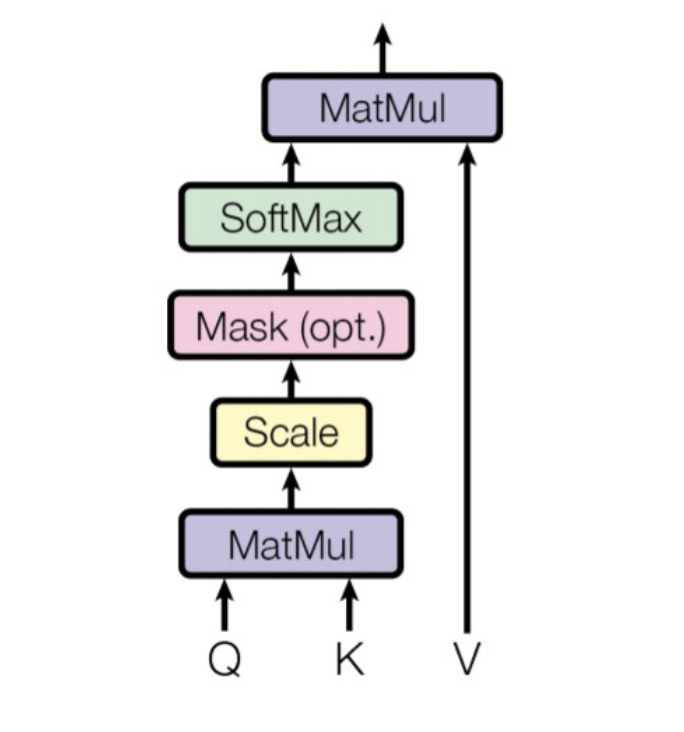

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    if mask is not None:
        scaled_attention_logits += (mask * -1e9)

    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
    output = tf.matmul(attention_weights, v)
    return output, attention_weights

In [ ]:
tf.transpose?

Multi-Headed Attention

The class inherits a parent class from tf.keras.layers.Layer, making the class itself a custom class.
some attributes are defined such as num_heads and d_model.

I also checked if model dimension is evenly divisible by number of heads without remainder.

Then followed by dense (fully connected) layers that learn to transform the input embeddings into queries (Q), keys (K), and values (V). After the attention heads are concatenated, this final layer projects the combined result back to the original d_model dimension, This helps preserve dimensional consistency across the Transformer layers.

Reshape the input x to separate heads:
  1. Input shape: (batch_size, seq_len, d_model)
  2. After reshape: (batch_size, seq_len, num_heads, depth)

Transpose the dimensions to bring the num_heads forward:
Final shape: (batch_size, num_heads, seq_len, depth)

**This shape is compatible with how scaled_dot_product_attention() expects input.**

the call is an abstraction method that ensures that the class is callable, as a function. here, i splitted the heads and computed the attention score independently for each of them. then i applied the transpose, This is to rearrange the tensor so i can combine all heads per token.

then concartenated the attention output back to the original embedding dimension (d_model). This lets the rest of the model work with a consistent representation shape.

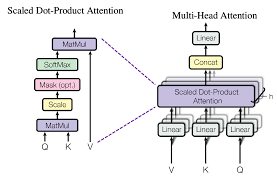



In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super().__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % num_heads == 0

        self.depth = d_model // num_heads

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]

        q = self.split_heads(self.wq(q), batch_size)
        k = self.split_heads(self.wk(k), batch_size)
        v = self.split_heads(self.wv(v), batch_size)

        scaled_attention, _ = scaled_dot_product_attention(q, k, v, mask)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))
        return self.dense(concat_attention)

Point-Wise feed forward network is basically a feedforward network with ReLU

In [ ]:
# Feed Forward Network
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),
        tf.keras.layers.Dense(d_model)
    ])

The Encoder layer can be on N numbers, the number of encoder layers depends on the task and computational resources. the N number of encoder layers will make it easier for each to focus on different parts fo the attention mechanism.

It is a custom layer using TensorFlow's Layer class — this makes the layer trainable, reusable, and integrable into transformer.

The Multi-head self-attention layeris defined as an attribute, ffn(point-wise feed forward network),

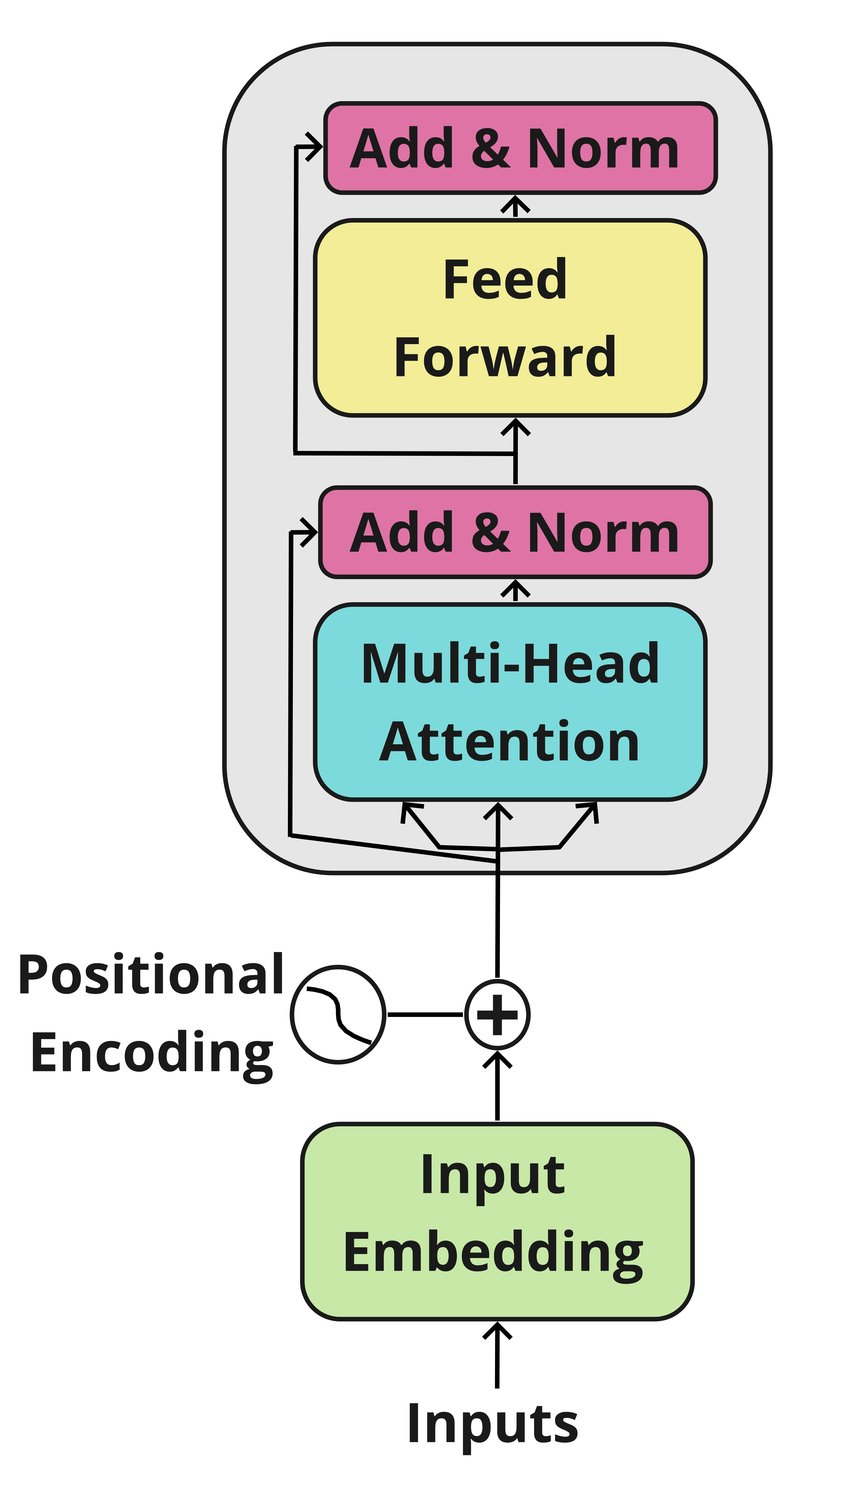


Layer Normalization is added to stabilize training and speeds up convergence. It normalizes across the features of each token vector, epsilon is a small number to prevent division by zero.

Dropout helps prevent overfitting. Dropout is applied after attention and feed-forward layers, before adding residuals.

The abstraction method is defined to make the class callable, and it implements the encoder  architecture as displayed in the note above.

Each encoder layer outputs the same shape as input (batch_size, seq_len, d_model), ready to be passed to the next encoder layer.



In [ ]:
# Encoder Layer
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super().__init__()
        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):
        attn_output = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

**The Decoder Architecture**

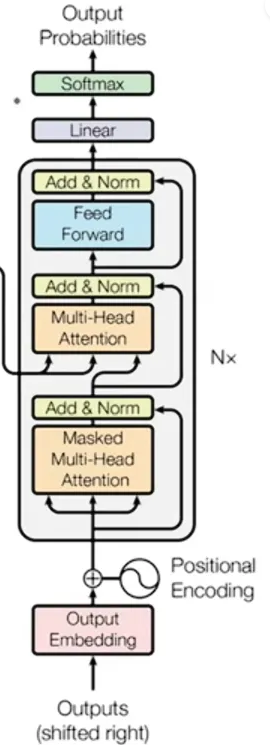In the Transformer Decoder, each layer enables the model to:

1. Look at the previous output tokens (self-attention — autoregressive).

2. Look at the encoder’s output (cross-attention).

3. Pass the result through a feed-forward network with normalization and dropout.

Each DecoderLayer processes one level of reasoning — stacking many builds deeper understanding during generation.

The class takes the following arguments,
d_model: Embedding size of tokens.

num_heads: Number of attention heads.

dff: Dimensionality of the feed-forward layer (inner hidden layer).

rate: Dropout rate.

the abstraction function representing the actual implementation of the encoder block from the Multi-headed attention to the last normalization layer the combines Residual connection from out2 → out2 + ffn_output.

Final layer norm gives the decoder layer’s output.

In [ ]:
# Decoder Layer
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super().__init__()
        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        attn1 = self.mha1(x, x, x, look_ahead_mask)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(x + attn1)

        attn2 = self.mha2(enc_output, enc_output, out1, padding_mask)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(out1 + attn2)

        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output, training=training)
        return self.layernorm3(out2 + ffn_output)

Combining the ENCODER LAYER

1. The Encoder Converts input token IDs into embeddings.

2. Adds position info so the model knows token order.

3. Passes these enriched vectors through multiple layers of self-attention + feed-forward networks.

4. Outputs a sequence of deep, context-rich token representations, ready for the Decoder to use.

the attributes are defined then __call__ abstraction implements the class,
here are the inputs:

**x**: Input token IDs (integers from tokenizer).

**training**: Boolean — True during training (enables dropout).

**mask**: A mask to ignore padding tokens during attention.

1. Converts token IDs to vectors.

2. Scales the embeddings by $$\frac{d}{d\,\text{model}}$$

3. Adds the positional information so the model knows where each token is. Only takes as much of the pos_encoding as needed for the current sequence length.
4. Applies dropout to the summed embeddings for regularization.
5. Runs the input x through each encoder layer in sequence.
Each layer: Applies multi-head self-attention, Applies feed-forward network, Adds skip connections + normalization.

In [ ]:
# Encoder
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff,
                 input_vocab_size, maximum_position_encoding, rate=0.1):
        super().__init__()
        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)
        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate)
                           for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]
        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training=training, mask=mask)


        return x

Combining the DECODER LAYER

The Decoder is the second half of the Transformer architecture. While the encoder processes the input sequence (Yoruba sentence), the decoder generates the output sequence (translated English sentence), one token at a time.

The Decoder is Autoregressive, meaning it generates the output sequence one at a time, and it does that through the Multi-Headed Attention while the mask is applied by using the look-ahead mask that applies -inf to future tokens making sure that while generating the next token, the token is only exposed to the previous token and to block the futute token, -inf is applied to the same size of the attention weights, multiplying both together will reduce the attention weight on the future words, such that when softmax is computed on the weight, the top-right triangle has 0 values, thereby blocking the future texts.

the abstraction function does this.
1. Converts target token IDs to dense vectors.

2. Scales embeddings.

3. Adds positional info (truncated to current sequence length).

4. Applies dropout for regularization.

the decoder layer is applied N number of times for the decoder layer to be used. through this for-loop, doing these at each iterations

1. Masked Self-Attention

2. Allows the model to only look at previous tokens in the target sequence.

3. Prevents cheating by looking ahead.

4. Encoder-Decoder Attention

5. Lets the decoder attend to the input (encoder output).

6. Aligns each generated word with relevant parts of the input.

7. Feed-Forward Network

8. Transforms the attended output with nonlinear operations.

Each token's representation becomes richer with each layer, carrying more global context about both input and output sequences.

In [ ]:
# Decoder
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff,
                 target_vocab_size, maximum_position_encoding, rate=0.1):
        super().__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate)
                           for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        seq_len = tf.shape(x)[1]
        attention_weights = {}
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]
        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
           x = self.dec_layers[i](
                x,
                enc_output,
                training=training,
                look_ahead_mask=look_ahead_mask,
                padding_mask=padding_mask
            )
        return x

**COMPLETE TRANSFORMER ARCHITECTURE**

This class implements the complete Transformer architecture as proposed in the paper “Attention Is All You Need”.


It combines the Encoder, Decoder, and a final output layer, forming a complete sequence-to-sequence model — Used for this Yoruba-English Translation task.

NOTE: read the previous implementation, you will understand some implementation and i would not repeat them.

1. The output encoder is computed
2. The output decoder is computed
3. The final Dense layer is computed, These logits represent the model’s confidence about which token should come next.

Input Tokens → Encoder → Contextual Embeddings

               ↓

 Target Tokens → Decoder → Final Output Logits




In [ ]:
# Full Transformer
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
                 target_vocab_size, pe_input, pe_target, rate=0.1):
        super(Transformer, self).__init__()

        self.encoder = Encoder(num_layers, d_model, num_heads, dff,
                               input_vocab_size, pe_input, rate)

        self.decoder = Decoder(num_layers, d_model, num_heads, dff,
                               target_vocab_size, pe_target, rate)

        self.final_layer = tf.keras.layers.Dense(target_vocab_size)

    def call(self, inp, tar, *, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):
        enc_output = self.encoder(inp, training=training, mask=enc_padding_mask)

        dec_output = self.decoder(
            tar, enc_output, training=training,
            look_ahead_mask=look_ahead_mask,
            padding_mask=dec_padding_mask
        )

        final_output = self.final_layer(dec_output)

        return final_output

Please read the previous note, i have discussed the look-ahead mask for decoder and padding mask for the encoder blocks,

**PADDING MASK**

In NLP, inputs (e.g., sentences) often vary in length. But neural networks (especially transformers) expect inputs in fixed-size batches. So shorter sequences are padded with a special token (like [PAD], 0, or <pad>) to make them all the same length.

Example:

Original sentences:
1. I love AI
2. Transformers are amazing

Tokenized (let’s say each word = 1 token):
1. [I, love, AI]                   → length = 3
2. [Transformers, are, amazing]   → length = 3

If max length is 5, we pad:
1. [I, love, AI, [PAD], [PAD]]
2. [Transformers, are, amazing, [PAD], [PAD]]

Input: [I, love, AI, [PAD], [PAD]]

Padding mask: [1, 1, 1, 0, 0]
0 representing the pad.

the mask is applied on the attention weight to ensure that the pad is not recognised when calc. the attention weight.

$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}} + \text{mask} \right)V
$$

making the pad seen as 0 and the important token in the sequence as 1 after softmax is applied.

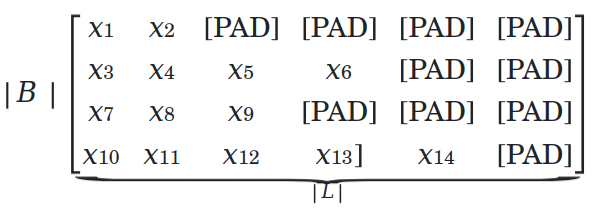

LOOK AHEAD MASK.

**I HAVE DISCUSSED THE LOOK-AHEAD MASK EARLIER, PLS READ PREVIOUS NOTE, BELOW ARE VISUAL DESCRIPTIONS OF THE LOOK-AHEAD MASK**

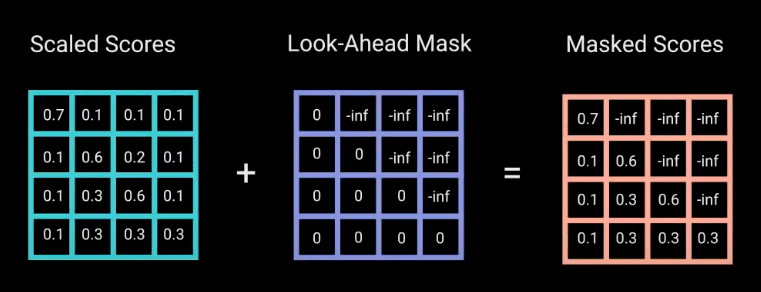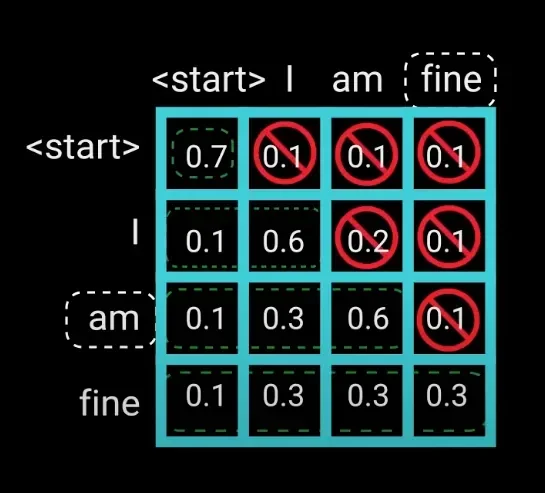


In [ ]:
# Hyperparameters
num_layers = 4
d_model = 128
dff = 512
num_heads = 8

EPOCHS = 50

transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=input_vocab_size,
    target_vocab_size=target_vocab_size,
    pe_input=1000,
    pe_target=1000)

TRAINING

It's decorated with **@tf.function**, meaning it will be compiled into a TensorFlow graph for efficiency — speeding up training.

**tar_inp** is the decoder input, excluding the last token <END>.

**tar_real** is the actual target, excluding the first token <START>, dont forget that these tokens has been added in the preprocessing earlier.

the padding mask on the encoding, decoding block including the combined mask of look-ahead-mask and decoder target mask.

tf.GradientTape() records the computation for automatic differentiation (needed for backprop) and  Passes the input and partial target to the full Transformer model. It also returns the predicted logits (shape: [batch_size, seq_len, vocab_size]) for each position in the target.

1. Compares the model’s predictions with the ground-truth tar_real.

2. The loss is categorical cross-entropy loss.

3. Padding tokens are usually masked out inside loss_function so they don’t contribute to loss.

4. **gradients = tape.gradient(loss, transformer.trainable_variables)** computes the Backpropagation step, Computes the gradient of the loss with respect to all trainable weights in the Transformer.

5. Optimizer (Adam) applies the gradients, This updates all Transformer weights to minimize the loss.

6. Updates a tf.keras.metrics.Mean() object that tracks average training loss across steps. Helps monitor training progress across epochs.

In [ ]:
# Training Step
@tf.function
def train_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)
    with tf.GradientTape() as tape:
        predictions = transformer(
                        inp,
                        tar_inp,
                        training=True,
                        enc_padding_mask=enc_padding_mask,
                        look_ahead_mask=combined_mask,
                        dec_padding_mask=dec_padding_mask
                    )

        loss = loss_function(tar_real, predictions)
    gradients = tape.gradient(loss, transformer.trainable_variables)
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
    train_loss(loss)

# Optimizer and Loss

There is an inheritance from a parent class 'tf.keras.optimizers.schedules.LearningRateSchedule', which helps to dynamically set the learning rate of the model, often good when training Deep learning models like transformers.

the _super().__init__()_ initialises the paerent class i mentioned earlier,

while the attribuites are defined, **self.d_model = tf.cast(d_model, tf.float32)** ensures that d_model is converted to float, ensuring compartibility in datatypes, the optional parameter defined warmup_steps, is also created as an attribute.

An abstractive class def__call__() is defined to ensure that the class is callable. while that implements converting the steps to float dtype as well, then **arg1** stores the reverse square root which is calculated on each step ensuring that it Decreases as step increases, this encourages learning rate decay over time. while arg2 implements the linear warmup component $$ \text{arg2} = \text{step} \times (\text{warmup_steps}^{-1.5})
$$ to encourage learning rate to increase for the first few thousand steps This is meant to gradually ramp up the learning rate at the start of training.

while the class returns a final output for the custom learning rate class using this formula

$$
\text{lr} = \frac{1}{\sqrt{d_{\text{model}}}} \cdot \min\left(\frac{1}{\text{step}}, \frac{\text{step}}{(\text{warmup\_steps})^{1.5}}\right)
$$


since the labels are integer-encoded, we use sparce as our loss function, **from_logits=True** tells TensorFlow that model outputs are raw logits (not softmax probabilities).

**reduction='none'** we compute the loss per token, not automatically reduced (so we can mask padding manually).

mask is used to mask out the padding token which is 0, making the masked token to be revealed as False.

loss_ Calculates the per-token cross-entropy loss, mask is  converted from boolean value to float.

**loss_ *= mask** applies a mask to the loss tensor to ignore padding tokens when calculating the final loss. It’s a crucial step in training sequence models like Transformers where inputs can have variable lengths

The function returns the Averages of the total loss over only the non-padding tokens

In [ ]:

# Optimizer and Loss
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super().__init__()
        self.d_model = tf.cast(d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, tf.float32)  # <-- add this line
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

learning_rate = CustomSchedule(d_model)
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_) / tf.reduce_sum(mask)


train_loss = tf.keras.metrics.Mean(name='train_loss')

NameError: name 'tf' is not defined

In [ ]:
# Split data
from sklearn.model_selection import train_test_split
inp_train, inp_val, targ_train, targ_val = train_test_split(input_tensor, target_tensor, test_size=0.1)

In [ ]:
# Training Loop
BATCH_SIZE = 64
BUFFER_SIZE = 20000

dataset = tf.data.Dataset.from_tensor_slices((inp_train, targ_train))
train_dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

for epoch in range(EPOCHS):
    train_loss.reset_state()
    for (batch, (inp, tar)) in enumerate(train_dataset):
        train_step(inp, tar)
    print(f"Epoch {epoch + 1}, Loss: {train_loss.result():.4f}")

Epoch 1, Loss: 9.9449
Epoch 2, Loss: 9.2087
Epoch 3, Loss: 8.0497
Epoch 4, Loss: 7.2996
Epoch 5, Loss: 7.0281
Epoch 6, Loss: 6.7285
Epoch 7, Loss: 6.4273
Epoch 8, Loss: 6.1453
Epoch 9, Loss: 5.8950
Epoch 10, Loss: 5.6642
Epoch 11, Loss: 5.4308
Epoch 12, Loss: 5.2032
Epoch 13, Loss: 4.9726
Epoch 14, Loss: 4.7396
Epoch 15, Loss: 4.5005
Epoch 16, Loss: 4.2591
Epoch 17, Loss: 4.0083
Epoch 18, Loss: 3.7600
Epoch 19, Loss: 3.4979
Epoch 20, Loss: 3.2310
Epoch 21, Loss: 2.9670
Epoch 22, Loss: 2.6973
Epoch 23, Loss: 2.4370
Epoch 24, Loss: 2.1940
Epoch 25, Loss: 1.9620
Epoch 26, Loss: 1.7510
Epoch 27, Loss: 1.5780
Epoch 28, Loss: 1.4259
Epoch 29, Loss: 1.2939
Epoch 30, Loss: 1.1647
Epoch 31, Loss: 1.0338
Epoch 32, Loss: 0.9327
Epoch 33, Loss: 0.8456
Epoch 34, Loss: 0.7709
Epoch 35, Loss: 0.7027
Epoch 36, Loss: 0.6513
Epoch 37, Loss: 0.5991
Epoch 38, Loss: 0.5579
Epoch 39, Loss: 0.5163
Epoch 40, Loss: 0.4840
Epoch 41, Loss: 0.4488
Epoch 42, Loss: 0.4292
Epoch 43, Loss: 0.4009
Epoch 44, Loss: 0.38

In [ ]:
def evaluate(inp_sentence, tokenizer_inp, tokenizer_tar, transformer, max_length=40):
    # Tokenize and encode the input sentence
    inp_sentence = tokenizer_inp.texts_to_sequences([inp_sentence])
    inp_tensor = tf.convert_to_tensor(inp_sentence)

    # Add start and end token to target input
    start_token = tokenizer_tar.word_index['<start>']
    end_token = tokenizer_tar.word_index['<end>']
    output = tf.convert_to_tensor([[start_token]])

    for i in range(max_length):
        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp_tensor, output)

        # Get predictions
        predictions = transformer(inp_tensor,
                                  output,
                                  training=False,
                                  enc_padding_mask=enc_padding_mask,
                                  look_ahead_mask=combined_mask,
                                  dec_padding_mask=dec_padding_mask)

        # Select the last predicted token
        predictions = predictions[:, -1:, :]  # (batch_size, 1, vocab_size)
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1)[:, -1:], tf.int32)

        # If <end> is predicted, stop
        if predicted_id == end_token:
            break

        # Concatenate predicted_id to output
        output = tf.concat([output, predicted_id], axis=-1)

    translated_sentence = tokenizer_tar.sequences_to_texts(output.numpy())[0]
    return translated_sentence

In [ ]:
import pickle

with open('tokenizer_inp.pkl', 'rb') as f:
    tokenizer_inp = pickle.load(f)

with open('tokenizer_tar.pkl', 'rb') as f:
    tokenizer_tar = pickle.load(f)

INFERENCE

In [ ]:
translated = evaluate("Adájọ́ àgbà lórílẹ̀ èdè Náíjíríà ", tokenizer_inp, tokenizer_tar, transformer)
translated = translated.split()
translated = ' '.join(i for i in translated[1:])
print("Translation:", translated)

Translation: heavy rainstorms strike the case of an independent and district court of justice


In [ ]:
transformer.save_weights('transformer_weights.weights.h5')

In [ ]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
nltk.download('punkt')  # needed for tokenizing if you want word-level

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
smoothie = SmoothingFunction().method4

bleu_scores = []

for src, ref in zip(source_sentences, target_sentences):
    # Get model prediction
    prediction = evaluate(src, tokenizer_inp, tokenizer_tar, transformer)

    # Tokenize reference and prediction
    reference_tokens = [ref.split()]  # Reference needs to be a list of list of tokens
    predicted_tokens = prediction.split()

    # Calculate BLEU score
    score = sentence_bleu(reference_tokens, predicted_tokens, smoothing_function=smoothie)
    bleu_scores.append(score)

# Average BLEU score
average_bleu = sum(bleu_scores) / len(bleu_scores)
print(f"Average BLEU score on test set: {average_bleu:.4f}")


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-e249f4b11307>", line 7, in <cell line: 0>
    prediction = evaluate(src, tokenizer_inp, tokenizer_tar, transformer)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-22-e46bcd4d79a2>", line 15, in evaluate
    predictions = transformer(inp_tensor,
                  ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__
    outputs = super().__call__(*args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_

TypeError: object of type 'NoneType' has no len()